### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [1]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
dp_data = raw_data.drop_duplicates()

#print(dp_data)
print(raw_data.shape)
print(dp_data.shape)





(20358, 34)
(19779, 34)


In [2]:
import pandas as pd


def turn_boolean(x):
    return x == x


raw_data = pd.read_csv('github_bot_raw_data.csv')
data = raw_data.drop_duplicates()
data = data.drop(columns='gravatar_id')


data[['company','blog','location','email']] = data[['company','blog','location','email']].map(turn_boolean)
#print(data[['company','blog','location','email']])

data = data.fillna('')

print(data.isnull())

    






       actor_id  label  login     id  node_id  avatar_url    url  html_url  \
0         False  False  False  False    False       False  False     False   
1         False  False  False  False    False       False  False     False   
2         False  False  False  False    False       False  False     False   
3         False  False  False  False    False       False  False     False   
4         False  False  False  False    False       False  False     False   
...         ...    ...    ...    ...      ...         ...    ...       ...   
20344     False  False  False  False    False       False  False     False   
20345     False  False  False  False    False       False  False     False   
20346     False  False  False  False    False       False  False     False   
20347     False  False  False  False    False       False  False     False   
20348     False  False  False  False    False       False  False     False   

       followers_url  following_url  ...  email  hireable    bi

In [3]:
import pandas as pd
import datetime
import re
import json


def turn_boolean(x):
    return x == x

def turn_timestamp(x):
    a = re.findall('\d+',x)
    a = list(map(int,a))
    t = datetime.datetime(a[0],a[1],a[2],a[3],a[4],a[5])
    return t.timestamp()
    



raw_data = pd.read_csv('github_bot_raw_data.csv')
data = raw_data.drop_duplicates()
data = data.drop(columns='gravatar_id')

data[['company','blog','location','email']] = data[['company','blog','location','email']].map(turn_boolean)
data = data.fillna('')



#转化时间戳
data['created_at'] = data['created_at'].map(turn_timestamp)
data['updated_at'] = data['updated_at'].map(turn_timestamp)


path = 'github_data.csv'
data.to_csv(path)







<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\liuyu\AppData\Local\Temp\ipykernel_7364\2403845219.py:11: SyntaxWarning: invalid escape sequence '\d'
  a = re.findall('\d+',x)


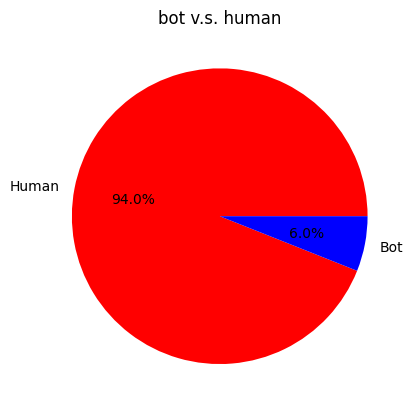

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = pd.read_csv('github_data.csv')
    
y = data['label'].value_counts()
list = np.array([y.Human,y.Bot])

plt.pie(list,labels=['Human','Bot'],colors=['red','blue'],autopct='%0.1f%%')
plt.title('bot v.s. human')
plt.show()

'''
人类占绝大多数
'''


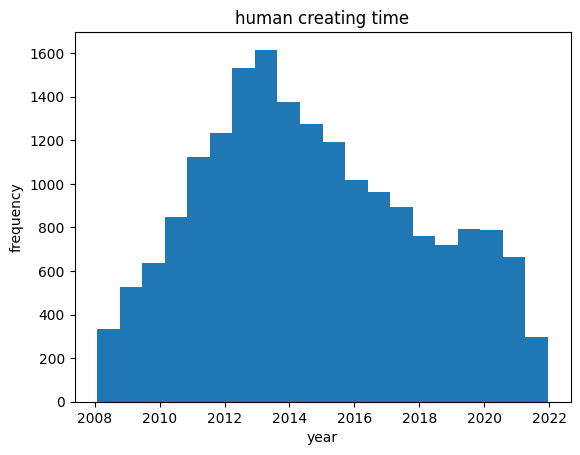

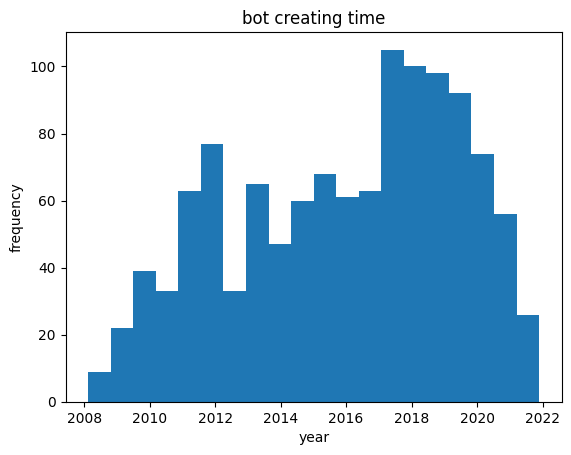

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date


human = pd.read_csv('human_data.csv')
h = human['created_at'].map(date.fromtimestamp)
bot = pd.read_csv('bot_data.csv')
b = bot['created_at'].map(date.fromtimestamp)


plt.hist(h,bins=20,label='human')
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('human creating time')
plt.show()

plt.hist(b,bins=20,label='bot')
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('bot creating time')
plt.show()

'''
人类创建账号事件集中在2013年，机器人在2018年
'''


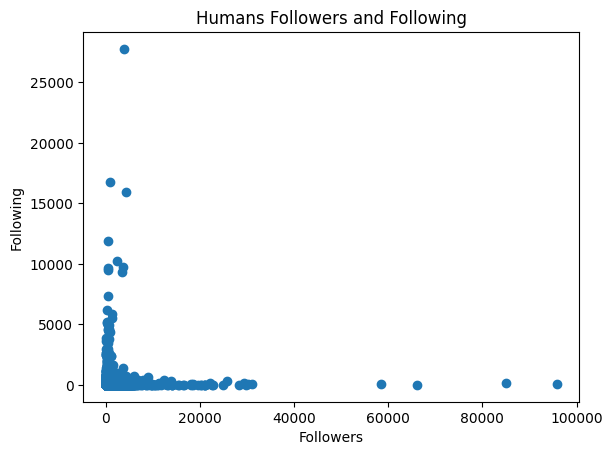

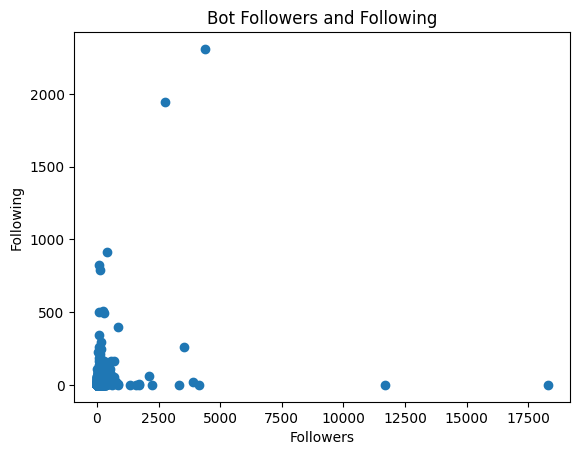

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


human = pd.read_csv('human_data.csv')
bot = pd.read_csv('bot_data.csv')

plt.scatter(human['followers'],human['following'])
plt.title('Humans Followers and Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()


plt.scatter(bot['followers'],bot['following'])
plt.title('Bot Followers and Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()